# Continuous Control with DDPG and 1 agent

## 1. Start the Environment

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt

import torch

from collections import deque
from ddpg_agent import Agent

ENV_FILE='./1_agent/Reacher.app'

In [ ]:
env = UnityEnvironment(file_name='./1_agent/Reacher.app')

brain_name = env.brain_names[0]
print(env.brain_names)

brain = env.brains[brain_name]

env_info = env.reset(train_mode=True)[brain_name]

num_agents = len(env_info.agents)

action_size = brain.vector_action_space_size

states = env_info.vector_observations

states.shape[1]

brain.vector_action_space_type

ERROR:root:Exception calling application: Ran out of input
Traceback (most recent call last):
  File "/Users/xavier/opt/anaconda3/envs/drlnd_cc/lib/python3.6/site-packages/grpc/_server.py", line 385, in _call_behavior
    return behavior(argument, context), True
  File "/Users/xavier/opt/anaconda3/envs/drlnd_cc/lib/python3.6/site-packages/unityagents/rpc_communicator.py", line 26, in Exchange
    return self.child_conn.recv()
  File "/Users/xavier/opt/anaconda3/envs/drlnd_cc/lib/python3.6/multiprocessing/connection.py", line 251, in recv
    return _ForkingPickler.loads(buf.getbuffer())
EOFError: Ran out of input


In [2]:
def ddpg( n_episodes=500, max_t=200, train_mode=True):
    env = UnityEnvironment(file_name=ENV_FILE)
    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]
    action_size = brain.vector_action_space_size
    env_info = env.reset(train_mode=train_mode)[brain_name]

    states = env_info.vector_observations

    agent = Agent(state_size=states.shape[1], action_size=action_size, random_seed=2)

 
    brain_name = env.brain_names[0]
    scores = []
    scores_deque = deque(maxlen=100)
    max_score = -np.Inf
    

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train_mode)[brain_name]
        num_agents = len(env_info.agents)
#         agent.reset()
        score = 0
        states = env_info.vector_observations
#         while True:
        for t in range(max_t):
            agent.reset()
            actions = agent.act(states)
#             actions = np.clip(actions, -1,1)
            env_info = env.step(actions)[brain_name]
            next_states= env_info.vector_observations
            rewards = env_info.rewards
#             rewards = [1.0  if x > 0.0 else 0.0 for x in rewards]
            dones = env_info.local_done
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            score += np.mean(env_info.rewards)
            if np.any(dones):
                break
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")

        if i_episode % 100 == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))   
        
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break

    env.close()
    return scores



scores = ddpg(n_episodes=1000, max_t=1000)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 6.47	Score: 14.14
Episode 193	Average Score: 30.09	Score: 38.57
Environment solved in 193 episodes!	Average Score: 30.09


In [3]:
print (scores)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11999999731779099, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11999999731779099, 0.0, 0.0, 0.0, 0.14999999664723873, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06999999843537807, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13999999687075615, 0.0, 0.1599999964237213, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09999999776482582, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

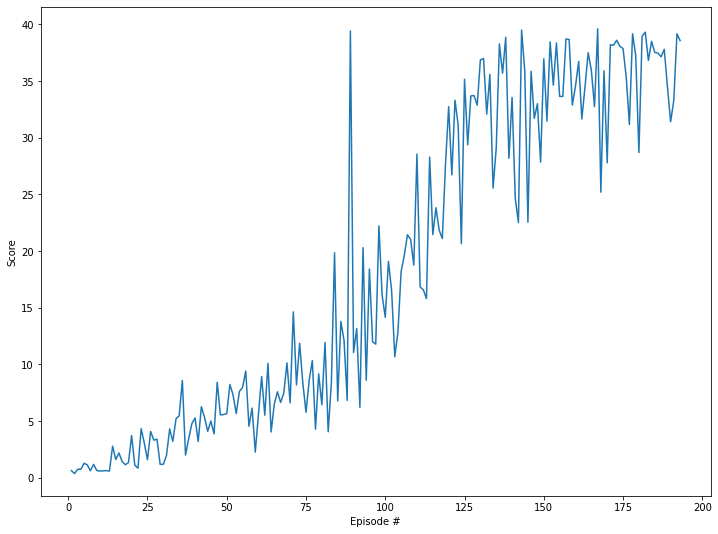

In [11]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('train_scores.png')
plt.show()

In [8]:
plt.figure(figsize=(15,10))
plt.savefig('train_scores.png')

<Figure size 1080x720 with 0 Axes>

In [4]:
env.close()

NameError: name 'env' is not defined

### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [2]:
env = UnityEnvironment(file_name=ENV_FILE)

brain_name = env.brain_names[0]
brain = env.brains[brain_name]
action_size = brain.vector_action_space_size
env_info = env.reset(train_mode=False)[brain_name]
states = env_info.vector_observations



agent = Agent(state_size=states.shape[1], action_size=action_size, random_seed=2)



agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

state = env.reset()
agent.reset()   
while True:
    action = agent.act(state)
    env.render()
    next_state, reward, done, _ = env.step(action)
    state = next_state
    if done:
        break
        
env.close()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


TypeError: expected np.ndarray (got dict)